In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Summer Olympic medallists 1896 to 2008 - ALL MEDALISTS.csv', skiprows=4)
df.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


## Task #L10.2

### На какой дистанции Jesse Owens выйграл медаль?

In [3]:
df[df.Athlete.str.contains('OWENS, Jesse')]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
6427,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,100m,M,Gold
6439,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,200m,M,Gold
6456,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,4x100m relay,M,Gold
6523,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,long jump,M,Gold


In [4]:
df[df['Athlete'] == 'OWENS, Jesse'] 

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
6427,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,100m,M,Gold
6439,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,200m,M,Gold
6456,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,4x100m relay,M,Gold
6523,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,long jump,M,Gold


### Какая страна выйграла большинство золотых медалей мужчинами в бадминтоне? Отсортировать результат в алфавитном порядке по имени игрока.

In [5]:
country=df[(df['Medal'] == 'Gold') & 
           (df['Gender'] == 'Men') & 
           (df['Sport'] == 'Badminton')]['NOC'].value_counts().head(1).index[0]
country


'INA'

In [6]:
df[(df['Medal'] == 'Gold') & (df['Gender'] == 'Men') & 
   (df['Sport'] == 'Badminton') & (df['NOC'] == country)].sort_values(by='Athlete')

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
20045,Barcelona,1992,Badminton,Badminton,"BUDI KUSUMA, Alan",INA,Men,singles,M,Gold
23701,Sydney,2000,Badminton,Badminton,"GUNAWAN, Tony",INA,Men,doubles,M,Gold
25734,Athens,2004,Badminton,Badminton,"HIDAYAT, Taufik",INA,Men,singles,M,Gold
27725,Beijing,2008,Badminton,Badminton,"KIDO, Markis",INA,Men,doubles,M,Gold
21771,Atlanta,1996,Badminton,Badminton,"MAINAKY, Rexy Ronald",INA,Men,doubles,M,Gold
27726,Beijing,2008,Badminton,Badminton,"SETIAWAN, Hendra",INA,Men,doubles,M,Gold
21772,Atlanta,1996,Badminton,Badminton,"SUBAGJA, Ricky Achmad",INA,Men,doubles,M,Gold
23702,Sydney,2000,Badminton,Badminton,"WIJAYA, Candra",INA,Men,doubles,M,Gold


### Какие три страны выйграли большинство медалей в последние годы (с 1984 по 2008)?

In [7]:
df[(df['Edition'] >= 1984) & (df['Edition']  <= 2008) ]['NOC'].value_counts().head(3)

USA    1837
AUS     762
GER     691
Name: NOC, dtype: int64

### Покажите мужчин золотых медалистов по 100m. Выведите результаты по убыванию года выйгрыша. Покажите город в котором проходила олимпиала, год, имя атлета и страну за которую он выступал.

In [8]:
df[(df['Gender'] == 'Men') &
   (df['Medal']  == 'Gold') &
   (df['Sport']  == 'Athletics') & 
   (df['Event']  == '100m') ].sort_values(by='Edition',ascending = False)[['City', 'Edition', 'Athlete', 'NOC']]

,City,Edition,Athlete,NOC
27552,Beijing,2008,"BOLT, Usain",JAM
25539,Athens,2004,"GATLIN, Justin",USA
23521,Sydney,2000,"GREENE, Maurice",USA
21598,Atlanta,1996,"BAILEY, Donovan",CAN
19859,Barcelona,1992,"CHRISTIE, Linford",GBR
18284,Seoul,1988,"LEWIS, Carl",USA
16794,Los Angeles,1984,"LEWIS, Carl",USA
15374,Moscow,1980,"WELLS, Allan",GBR
14069,Montreal,1976,"CRAWFORD, Hasely",TRI
12902,Munich,1972,"BORZOV, Valery",URS


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Task #L10.3

### Используя  groupby(), постройте график число всех медалей выйгранных на каждой олимпиаде.

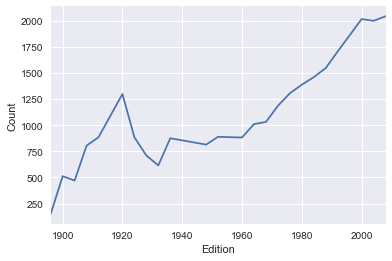

In [11]:
df.groupby('Edition')['Edition'].count().plot()
plt.xlabel(u'Edition')
plt.ylabel(u'Count');

### Создайте список показывающий число всех медалей выйгранных каждой страной в течение всей истории олимпийских игр. Для каждой страны, необходимо показать год первой и последней заработанной медали.

In [12]:
df.groupby('NOC')['Edition'].agg(['first','last','count']).sort_values(by='count', ascending = False)

,first,last,count
NOC,,,
USA,1896,2008,4335
URS,1952,1988,2049
GBR,1896,2008,1594
FRA,1896,2008,1314
ITA,1900,2008,1228
GER,1896,2008,1211
AUS,1896,2008,1075
HUN,1896,2008,1053
SWE,1900,2008,1021


## Task #L10.4

### Постройте график числа золотых медалей выйгранных США мужчинами и женщинами в атлетике?

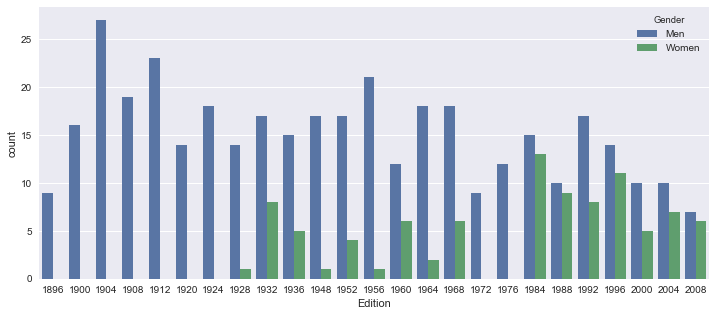

In [53]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 5

df1 = df[(df['NOC'] == 'USA') & (df['Sport'] == 'Athletics')& (df['Medal'] == 'Gold')] 
sns.countplot(x='Edition',data=df1, hue='Gender');

### Постройте график 5 атлетов которые выйграли большинство золотых медалей. 

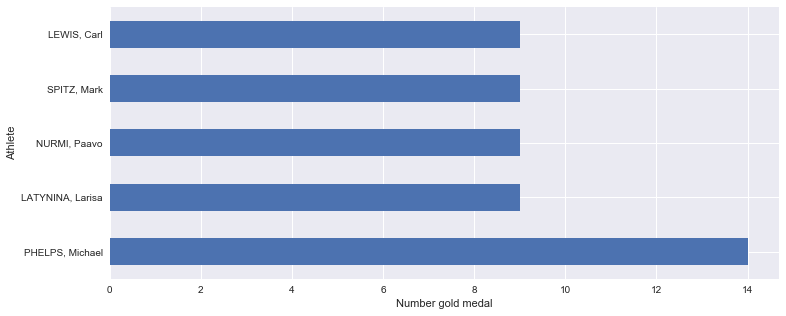

In [68]:
df1 = df[(df['Medal'] == 'Gold')].groupby('Athlete')['Medal'].count().sort_values(ascending = False).head(5)
plt.xlabel('Number gold medals')
df1.plot( kind='barh');

## HW #L10.1
### Постройте таблицу в которой по годам всех олимпиад покажите топовых атлетов США(1 атлет на год) по общему количеству медалей? Включите дисциплину атлета.

In [96]:
df_filtered = df[(df['NOC'] == 'USA')].groupby(['Edition', 
                                        'Athlete', 'Sport'])['Medal'].agg(['count'])
df1 = df_filtered.reset_index()
df2 = df_filtered.groupby(['Edition']).max().reset_index()

result = df2.merge(df1, 'left', on=['Edition', 'count'])

table = result.groupby('Edition',group_keys=False)

table.head()

,Edition,count,Athlete,Sport
0,1896,4,"GARRETT, Robert",Athletics
1,1900,5,"BAXTER, Irving",Athletics
2,1900,5,"TEWKSBURY, Walter B. John",Athletics
3,1904,6,"DOWNING, Burton",Cycling
4,1904,6,"EYSER, George",Gymnastics
5,1904,6,"HEIDA, Anton",Gymnastics
6,1908,3,"SHEPPARD, Melvin",Athletics
7,1908,3,"SHERIDAN, Martin",Athletics
8,1912,4,"OSBURN, Carl Townsend",Shooting
9,1920,7,"LEE, Willis",Shooting
